# Classificação de imagens com Convolutional Neural Networks

## Imports

In [14]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Análise Exploratória (EDA)

### Carregar dataset

In [15]:
# Carregar o dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Lista de classes

In [16]:
# Lista de classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Mostrar 10 imagens aleatórias com labels

/tmp/ipykernel_35686/663913738.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


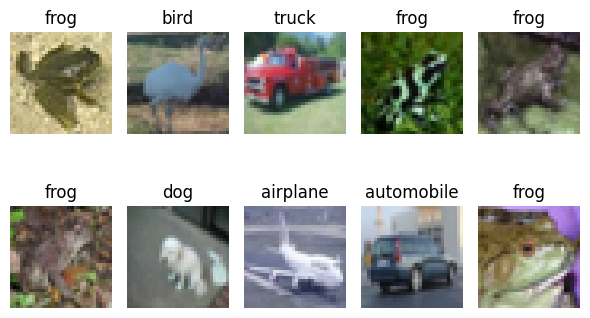

In [17]:
plt.figure(figsize=(6, 4))
for i in range(10):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx])
    plt.title(classes[int(y_train[idx])])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Pré-Processamento

### Normalizar os dados (de 0-255 para 0-1)

In [18]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0 

### Converter os rótulos para one-hot encoding

In [19]:
y_train_cat = to_categorical(y_train, len(classes))
y_test_cat = to_categorical(y_test, len(classes))

### Verificar dimensões

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
y_train_cat.shape

(50000, 10)

## Criando o modelo CNN

### Função importante

In [22]:
def plots(history):
    # Plotar os gráficos 2x2
    history_dict = history.history
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Acurácia - Treinamento
    axs[0, 0].plot(history_dict['accuracy'], label='Treinamento')
    axs[0, 0].set_title('Acurácia - Treino')
    axs[0, 0].set_xlabel('Época')
    axs[0, 0].set_ylabel('Acurácia')
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Acurácia - Validação
    axs[0, 1].plot(history_dict['val_accuracy'], label='Validação', color='orange')
    axs[0, 1].set_title('Acurácia - Validação')
    axs[0, 1].set_xlabel('Época')
    axs[0, 1].set_ylabel('Acurácia')
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Loss - Treinamento
    axs[1, 0].plot(history_dict['loss'], label='Treinamento', color='green')
    axs[1, 0].set_title('Loss - Treino')
    axs[1, 0].set_xlabel('Época')
    axs[1, 0].set_ylabel('Loss')
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Loss - Validação
    axs[1, 1].plot(history_dict['val_loss'], label='Validação', color='red')
    axs[1, 1].set_title('Loss - Validação')
    axs[1, 1].set_xlabel('Época')
    axs[1, 1].set_ylabel('Loss')
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

### Definindo arquitetura da CNN comum

In [35]:
def CNN_CIFAR10(x_train, y_train, x_test, y_test, epochs, sumarity=True):
    # Definir a arquitetura do modelo
    model = Sequential()

    # 1ª camada convolucional
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2ª camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3ª camada convolucional
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Achatar e adicionar densa
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Regularização

    # Saída - 10 classes (CIFAR-10)
    model.add(Dense(10, activation='softmax'))

    # Compilar o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Resumo da arquitetura
    if sumarity:
        model.summary()
        return model

    # Treinamento do modelo
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=64,
        validation_data=(x_test, y_test),
        callbacks=[early_stop]
    )

    #Plotando gráficos
    plots(history)

    return model

CNN_CIFAR10(0, 0, 0, 0, 0)

/home/jonnathann/Documentos/portifolio_jonnathann/env_ra/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential_9, built=True>

### Definindo arquitetura da CNN com data argumentation

In [42]:
def CNN_CIFAR10_ARG(x_train, y_train, x_test, y_test, epochs, summary=True, use_augmentation=False):

    model = Sequential()

    # 1º bloco conv
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 2º bloco conv
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # 3º bloco conv
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Flatten + Dense
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Compilação
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    if summary:
        model.summary()
        return model

    # Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    if use_augmentation:
        print("Usando Data Augmentation...")
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True
        )
        datagen.fit(x_train)

        history = model.fit(
            datagen.flow(x_train, y_train, batch_size=64),
            epochs=epochs,
            validation_data=(x_test, y_test),
            callbacks=[early_stop]
        )
    else:
        history = model.fit(
            x_train, y_train,
            batch_size=64,
            epochs=epochs,
            validation_data=(x_test, y_test),
            callbacks=[early_stop]
        )

    #Plotando gráficos
    plots(history)
        
    return model

CNN_CIFAR10_ARG(0, 0, 0, 0, 0, summary=True, use_augmentation=False)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

<Sequential name=sequential_14, built=True>

### Treinando o modelo CNN comum

Epoch 1/20


2025-04-11 10:01:36.902831: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 97ms/step - accuracy: 0.2735 - loss: 1.9126 - val_accuracy: 0.5144 - val_loss: 1.3431
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5160 - loss: 1.3659 - val_accuracy: 0.5783 - val_loss: 1.1899
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.5755 - loss: 1.2020 - val_accuracy: 0.6301 - val_loss: 1.0468
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6233 - loss: 1.0719 - val_accuracy: 0.6540 - val_loss: 0.9826
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.6564 - loss: 0.9817 - val_accuracy: 0.6655 - val_loss: 0.9299
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6812 - loss: 0.9126 - val_accuracy: 0.6636 - val_loss: 0.9520
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6958 - loss: 0.8701 - val_accuracy: 0.6905 - val_loss: 0.8677
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.7137 - loss: 0.8160 - val_accurac

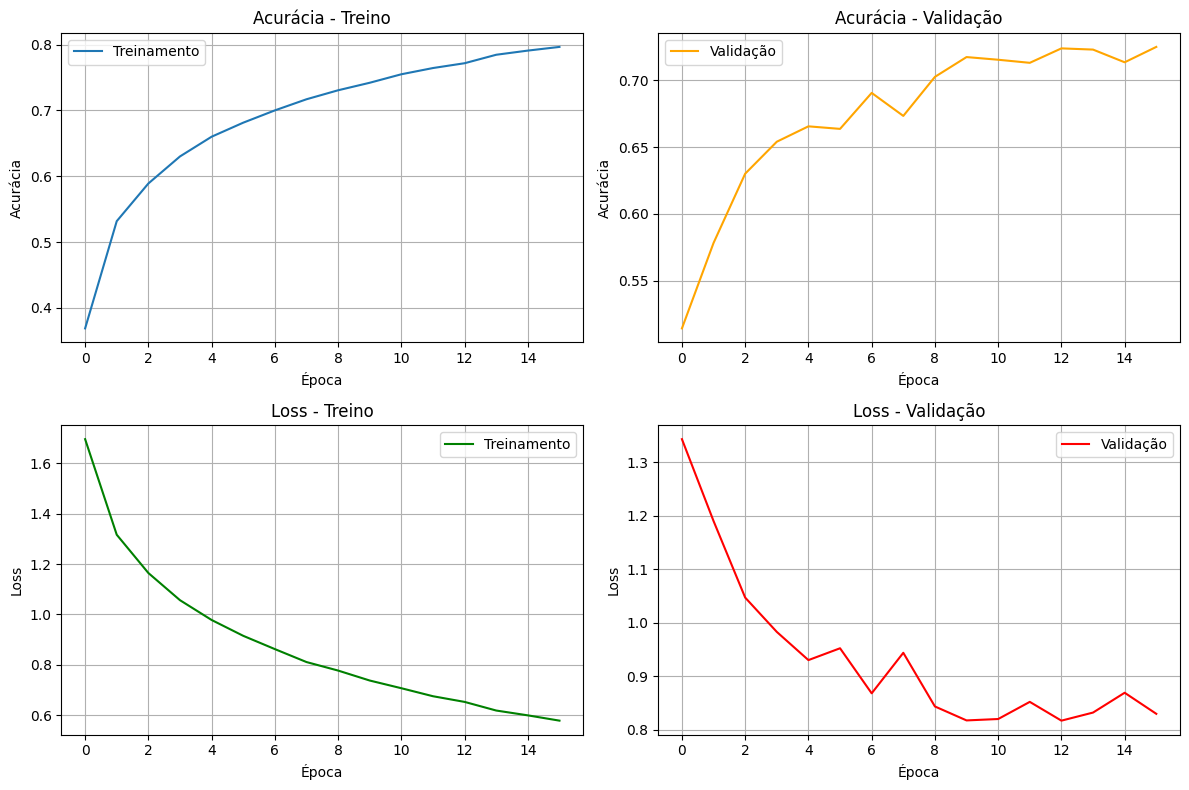

In [38]:
model = CNN_CIFAR10(x_train, y_train_cat, x_test, y_test_cat, 20, sumarity=False)

#Salvando modelo salvo no diretório models
model.save("../models/cnn_cifar10_model.h5")


In [39]:
#Carregando modelo salvo no diretório models
_model = load_model("../models/cnn_cifar10_model.h5")

test_loss, test_acc = _model.evaluate(x_test, y_test_cat, verbose=2)
print('Erro:', test_loss, 'Acurácia:', test_acc)


313/313 - 5s - 16ms/step - accuracy: 0.7238 - loss: 0.8166
Erro: 0.8166279792785645 Acurácia: 0.723800003528595


### Treinando CNN com data argumentation

Usando Data Augmentation...
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 520s 653ms/step - accuracy: 0.3342 - loss: 2.0675 - val_accuracy: 0.5107 - val_loss: 1.4566
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 519s 663ms/step - accuracy: 0.5454 - loss: 1.2706 - val_accuracy: 0.5909 - val_loss: 1.1660
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 533s 681ms/step - accuracy: 0.6216 - loss: 1.0640 - val_accuracy: 0.6640 - val_loss: 0.9723
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 535s 683ms/step - accuracy: 0.6682 - loss: 0.9543 - val_accuracy: 0.6658 - val_loss: 0.9999
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 534s 683ms/step - accuracy: 0.6988 - loss: 0.8650 - val_accuracy: 0.6849 - val_loss: 0.9264
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 535s 684ms/step - accuracy: 0.7141 - loss: 0.8229 - val_accuracy: 0.7470 - val_loss: 0.7294
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 539s 689ms/step - accuracy: 0.7313 - loss: 0.7810 - val_accuracy: 0.7566 - val_loss: 0.7160
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 539s 690

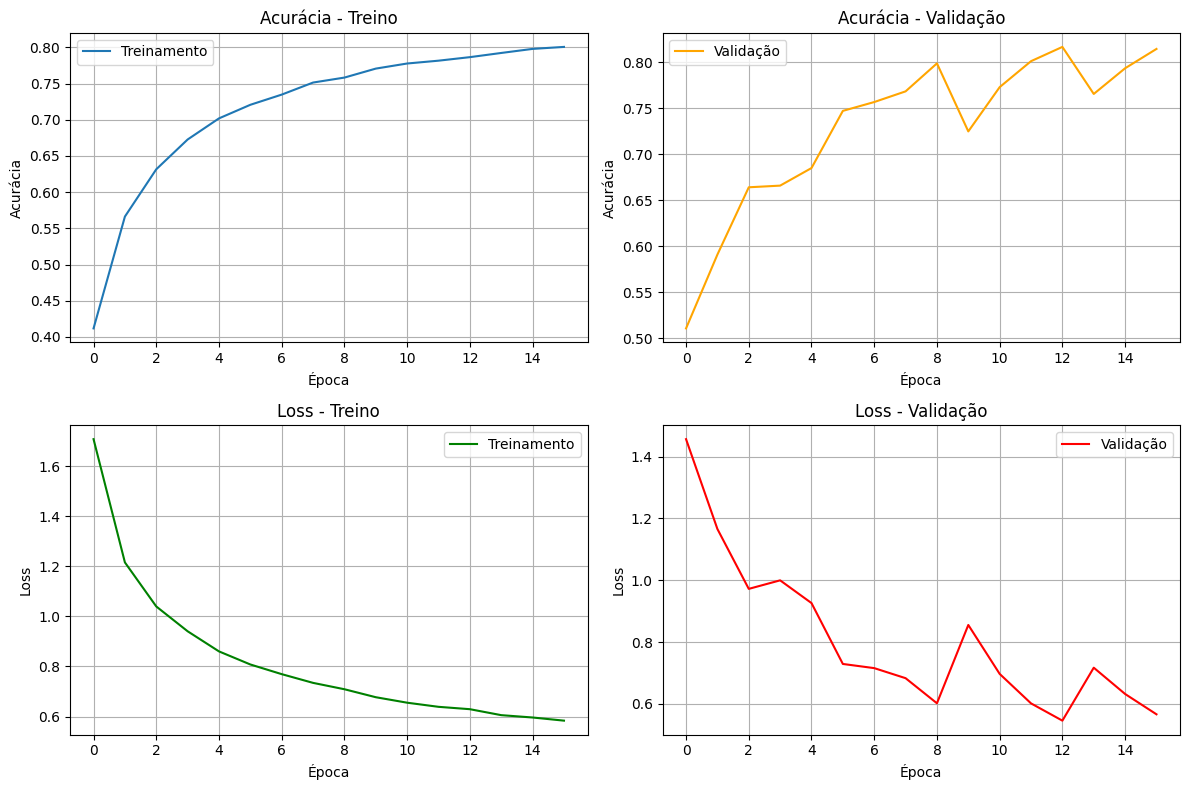

In [44]:
model =  CNN_CIFAR10_ARG(x_train, y_train_cat, x_test, y_test_cat, 20, summary=False, use_augmentation=True)

#Salvando modelo salvo no diretório models
model.save("../models/cnn_cifar10_dtarg_model.h5")

In [45]:
#Carregando modelo salvo no diretório models
_model_dtarg = load_model("../models/cnn_cifar10_dtarg_model.h5")

test_loss, test_acc = _model_dtarg.evaluate(x_test, y_test_cat, verbose=2)
print('Erro:', test_loss, 'Acurácia:', test_acc)

313/313 - 17s - 56ms/step - accuracy: 0.8165 - loss: 0.5461
Erro: 0.546078622341156 Acurácia: 0.8165000081062317
